In [1]:
%matplotlib inline

In [2]:
from pathlib import Path
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot
import eelbrain
import mne
import trftools

from pprint import pprint
import numpy as np

In [3]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)
print(len(Native_SUBJECTS))

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq

In [36]:
## Codes here failed terriblely
modelsLIST = ['envelope', 'envelope+onset', 'acoustic', 'words', 'words+lexical', 'acoustic+words', 'acoustic+words+lexical']
"""
modelsDICT = {
    # Acoustic models
    'envelope': ["envelope"],
    'envelope+onset': ["envelope, onset_envelope"],
    'acoustic': ["gammatone, gammatone_onsets"],

    # Models with word-onsets and word-class
    'words': ["word_onsets"],
    'words+lexical': ["word_onsets, word_lexical, word_nlexical"],  # covariant model
    'acoustic+words': ["gammatone, gammatone_onsets, word_onsets"],
    'acoustic+words+lexical': ["gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical"]
}
"""   
    
for subject in Native_SUBJECTS:
    subject_trf_dir = TRF_DIR / subject  # TRF_DIR / subject[4:8] == original path
    #subject_trf_dir.mkdir(exist_ok=True) # shut down for now
    # Generate all TRF paths so we can check whether any new TRFs need to be estimated
    trf_paths = {model: subject_trf_dir / f'{subject} {model}.pickle' for model in models}
    print(trf_paths)
    '''
    ## The explaination of the above command
    for model in models:
        trf_paths = {model: subject_trf_dir / f'{subject} {model}.pickle'}
        pprint(trf_paths)
        
    for model, predictors in modelsDICT.items():
        print(model)
        """ ## Return result ##
        envelope
        envelope+onset
        acoustic
        words
        words+lexical
        acoustic+words
        acoustic+words+lexical
        """
    '''
    for model in modelsLIST:
        path = trf_paths[model]
        #print(path)
        trf = eelbrain.load.unpickle(TRF_DIR / subject / f'{subject} {model}.pickle')
        print(trf)
        #print(trf[:3, ])
        eelbrain.save.pickle(trf[:3], path)
    #n_trf = 
    #eelbrain.save.pickle(trf, path)

{'envelope': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S13_Alice-natives_sfreq-100_raw.fif/S13_Alice-natives_sfreq-100_raw.fif envelope.pickle'), 'envelope+onset': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S13_Alice-natives_sfreq-100_raw.fif/S13_Alice-natives_sfreq-100_raw.fif envelope+onset.pickle'), 'acoustic': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S13_Alice-natives_sfreq-100_raw.fif/S13_Alice-natives_sfreq-100_raw.fif acoustic.pickle'), 'words': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S13_Alice-natives_sfreq-100_raw.fif/S13_Alice-natives_sfreq-100_raw.fif words.pickle'), 'words+lexical': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S13_Alice-natives_sfreq-100_raw.fif/S13_Alice-natives_sfreq-100_raw.fif words+l

S18 acoustic.pickle
S18 words.pickle
S18 words+lexical.pickle
S18 acoustic+words.pickle
S18 acoustic+words+lexical.pickle
{'envelope': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S19_Alice-natives_sfreq-100_raw.fif/S19_Alice-natives_sfreq-100_raw.fif envelope.pickle'), 'envelope+onset': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S19_Alice-natives_sfreq-100_raw.fif/S19_Alice-natives_sfreq-100_raw.fif envelope+onset.pickle'), 'acoustic': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S19_Alice-natives_sfreq-100_raw.fif/S19_Alice-natives_sfreq-100_raw.fif acoustic.pickle'), 'words': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S19_Alice-natives_sfreq-100_raw.fif/S19_Alice-natives_sfreq-100_raw.fif words.pickle'), 'words+lexical': PosixPath('/Volumes/Neurolang_1/Master Program/New_The

S08 acoustic+words.pickle
S08 acoustic+words+lexical.pickle
{'envelope': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S10_Alice-natives_sfreq-100_raw.fif/S10_Alice-natives_sfreq-100_raw.fif envelope.pickle'), 'envelope+onset': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S10_Alice-natives_sfreq-100_raw.fif/S10_Alice-natives_sfreq-100_raw.fif envelope+onset.pickle'), 'acoustic': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S10_Alice-natives_sfreq-100_raw.fif/S10_Alice-natives_sfreq-100_raw.fif acoustic.pickle'), 'words': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S10_Alice-natives_sfreq-100_raw.fif/S10_Alice-natives_sfreq-100_raw.fif words.pickle'), 'words+lexical': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S10_Alice-natives_s

{'envelope': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S40_Alice-natives_sfreq-100_raw.fif/S40_Alice-natives_sfreq-100_raw.fif envelope.pickle'), 'envelope+onset': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S40_Alice-natives_sfreq-100_raw.fif/S40_Alice-natives_sfreq-100_raw.fif envelope+onset.pickle'), 'acoustic': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S40_Alice-natives_sfreq-100_raw.fif/S40_Alice-natives_sfreq-100_raw.fif acoustic.pickle'), 'words': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S40_Alice-natives_sfreq-100_raw.fif/S40_Alice-natives_sfreq-100_raw.fif words.pickle'), 'words+lexical': PosixPath('/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results/TRFs_Natives/S40_Alice-natives_sfreq-100_raw.fif/S40_Alice-natives_sfreq-100_raw.fif words+l

## Natives Auditory TRFs

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],  # covariant model
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
        
        # Language Models
        'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],
        'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],
        'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical]
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

In [7]:
## TRF: envelope ##
n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    n_subj = int(subj[1:3])
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d/S%.2d envelope.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    #print(trf.h[0])
    #print(trf.h_scaled)
    print(trf.x_mean)
    n_rowsLIST.append([n_subj, trf.proportion_explained, trf.h[0]])#.abs()])

#data_env = eelbrain.Dataset.from_caselist(['subject', 'det', 'trf'], n_rowsLIST)
#pprint(n_rowsLIST)
#print(data_env)

"""
#test that model predictive power on held-out data is > 0
test_envelope = eelbrain.testnd.TTestOneSample('det', ds=data_env, tail=1, pmin=0.05)
#p = eelbrain.plot.Topomap(test_envelope)
#cb = p.plot_colorbar(width=0.1)


# ## Envelope TRF
# Test the TRF with a one-sample *t*-test against 0. This tests the null-hypothesis that the electrical current direction at each time point was random across subjects. The systematic current directions shown below at anterior electrodes are typical of auditory responses. 
trf_envelope = eelbrain.testnd.TTestOneSample('trf', ds=data_env, pmin=0.05)
print(trf_envelope)  # print out the stats results
onesample_clus = trf_envelope.find_clusters(0.05)
print(onesample_clus) # print out the cluster result

p1 = eelbrain.plot.TopoArray(trf_envelope,t=[0.05, 0.15], clip='circle', cmap='xpolar', h=4, w=8) #, t=[0.08, 0.16, 0.22, 0.45]
cb = p1.plot_colorbar(width=0.1)

#p1.save(TRF_DIR / 'Natives_envelope-TRFs.png')
"""
"""
# USELESS PIC
trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))
trf_sensor = trf.proportion_explained
print(trf_sensor)
print(trf.h[0].shape)

#print(type(trf.h))
#plt.plot(trf.h[:,0,:])
p = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)

#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)
#p.set_time(.180)
"""

<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 sensor, 114 time>,)
(878.3303960970518,)
<NDVar 'envelope': 59 sensor, 114 time>
(<NDVar 'envelope': 59 s

"\n# USELESS PIC\ntrf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d_Alice-natives_sfreq-100_raw.fif/S%.2d_Alice-natives_sfreq-100_raw.fif acoustic.pickle'%(subj, subj)))\ntrf_sensor = trf.proportion_explained\nprint(trf_sensor)\nprint(trf.h[0].shape)\n\n#print(type(trf.h))\n#plt.plot(trf.h[:,0,:])\np = eelbrain.plot.TopoButterfly(trf.h[0], w=6, h=5)\n\n#p = eelbrain.plot.TopoButterfly(trf.h[0], w=10, h=4, sensors=trf_sensor)\n#p.set_time(.180)\n"

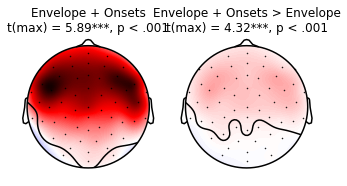

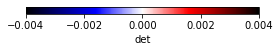

In [22]:
## TRF: envelope+onset ##
n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    n_subj = int(subj[1:3])
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d/S%.2d envelope+onset.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([subj[1:3], trf.proportion_explained, *trf.h])#.abs()])
    x_names = trf.x
data_onset = eelbrain.Dataset.from_caselist(['subject', 'det', *x_names], n_rowsLIST)
#pprint(n_rowsLIST)
#print(data_onset)
test_onset = eelbrain.testnd.TTestOneSample('det', ds=data_onset, tail=1, pmin=0.05)

# Paired t-test by specifying two measurement NDVars with matched cases
# Note that this presupposes that subjects are in the same order
# data_onset['det'], data_env['det'], tail=1 == 'envelope+onset': [envelope, onset_envelope] >/- 'envelope': [envelope]
test_onset_envelope = eelbrain.testnd.TTestRelated(data_onset['det'], data_env['det'], tail=1, pmin=0.05)
p2 = eelbrain.plot.Topomap(
    [test_onset.masked_difference(), test_onset_envelope.masked_difference()], 
    axtitle=[['Envelope + Onsets\n', test_onset], ['Envelope + Onsets > Envelope\n', test_onset_envelope]],
    ncol=2, clip='circle')
cb = p2.plot_colorbar(width=0.1)

p2.save(TRF_DIR / 'Natives_Envelope+onset-TRFs_topo.png')

[[13,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 [14,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 [12,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 [15,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 [11,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 [16,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'gammatone_on': 59 sensor, 8 frequency, 114 time>],
 [17,
  <NDVar '1': 59 sensor>,
  <NDVar 'gammatone': 59 sensor, 8 frequency, 114 time>,
  <NDVar 'g

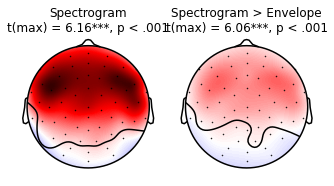

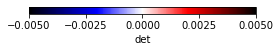

In [16]:
rows = []
x_names = None

n_rowsLIST = []
    
for subj in Native_SUBJECTS:
    n_subj = int(subj[1:3])
    trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d/S%.2d acoustic.pickle'%(int(subj[1:3]), int(subj[1:3]))))
    n_rowsLIST.append([n_subj, trf.proportion_explained, *trf.h])#.abs()])
    x_names = trf.x
data_acoustic = eelbrain.Dataset.from_caselist(['subject', 'det', *x_names], n_rowsLIST)
pprint(n_rowsLIST)
print(data_onset)

# Compare predictive power of the two models
test_acoustic = eelbrain.testnd.TTestOneSample('det', ds=data_acoustic, tail=1, pmin=0.05)

# Paired t-test by specifying two measurement NDVars with matched cases
# Note that this presupposes that subjects are in the same order
test_acoustic_onset = eelbrain.testnd.TTestRelated(data_acoustic['det'], data_onset['det'], tail=1, pmin=0.05)
p3 = eelbrain.plot.Topomap(
    [test_acoustic.masked_difference(), test_acoustic_onset.masked_difference()], 
    axtitle=[[['Spectrogram\n', test_acoustic], ], ['Spectrogram > Envelope\n', test_acoustic_onset]],
    ncol=2, clip='circle')
cb = p3.plot_colorbar(width=0.1)

#p3.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')

<class 'eelbrain._data_obj.NDVar'>


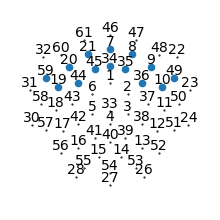

In [9]:
### LATER ANALYSIS  ###
# ## TRFs
# Since these spectrogram mTRFs have a frequency dimension in addition to time and sensor we have to slice or aggregate them for visualization on a 2d plot. We take two approaches: 
#
#  1) Sum across the frequency, based on the assumtopn that TRFs are similar for different frequency bands
#  2) Average across a group of neighboring sensors, to verify this assumtopn 

trf_spectrogram = eelbrain.testnd.TTestOneSample("gammatone.sum('frequency')", ds=data_acoustic, pmin=0.05)
trf_onset_spectrogram = eelbrain.testnd.TTestOneSample("gammatone_on.sum('frequency')", ds=data_acoustic, pmin=0.05)

#p4 = eelbrain.plot.TopoArray([trf_spectrogram, trf_onset_spectrogram], t=[0.050, 0.100, 0.150, 0.450], xlim=(-0.050, 0.950))

# Manually define sensors that are sensitive to acoustic responses 
auditory_sensors = ['59', '20', '21', '7', '8', '9', '49', '19' ,'44', '45', '34' ,'35' ,'36' ,'10']
p5 = eelbrain.plot.SensorMap(data_acoustic['det'], h=2, mark=auditory_sensors)

#strf_spectrogram = data_acoustic['gammatone'].mean(sensor=auditory_sensors).smooth('frequency', window_samples=7, fix_edges=True)
print(type(data_acoustic['gammatone'].mean(sensor=auditory_sensors)))
#strf_onset_spectrogram = data_acoustic['gammatone_on'].mean(sensor=auditory_sensors)
#p6 = eelbrain.plot.Array([strf_spectrogram, strf_onset_spectrogram], ncol=2, xlim=(-0.050, 0.950))


#p4.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')
#p5.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')
#p6.save(TRF_DIR / 'Natives_acoustic-TRFs_topo.png')

In [45]:
# Load cross-validated preditive power of all models
models = ['envelope', 'envelope+onset', 'acoustic']
n_rowsLIST = []

for model in models:
    for subj in Native_SUBJECTS:
        n_subj = int(subj[1:3])
        trf = eelbrain.load.unpickle(TRF_DIR / Path('S%.2d/S%.2d %s.pickle'%(int(subj[1:3]), int(subj[1:3]), model)))
        n_rowsLIST.append([n_subj, model, trf.proportion_explained])
model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], n_rowsLIST)
# For more interpretable numbers, express proportion explained in terms of the maximum explained variability by the full model
index = model_data['model'] == 'acoustic'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')

# Redo tests with adjusted predictive power 
test_envelope = eelbrain.testnd.TTestOneSample('det', sub="model == 'envelope'", ds=model_data, tail=1, pmin=0.05)
test_acoustic = eelbrain.testnd.TTestOneSample('det', sub="model == 'acoustic'", ds=model_data, tail=1, pmin=0.05)
test_onset_envelope = eelbrain.testnd.TTestRelated('det', 'model', 'envelope+onset', 'envelope', 'subject', ds=model_data, tail=1, pmin=0.05)
test_acoustic_onset = eelbrain.testnd.TTestRelated('det', 'model', 'acoustic', 'envelope+onset', 'subject', ds=model_data, tail=1, pmin=0.05)

t_envelope = [0.050, 0.150, 0.300]# old timepoint = [0.050, 0.100, 0.150, 0.400]
t_onset = [0.060, 0.190] # old timepoint = [0.060, 0.110, 0.180]

# T-test on Env+Onset TRF's "Env" part
trf_eo_envelope = eelbrain.testnd.TTestOneSample('envelope', ds=data_onset, pmin=0.05)
print(trf_eo_envelope)  # print out the stats results
onesample_eoEnv_clus = trf_eo_envelope.find_clusters(0.05)
print(onesample_eoEnv_clus) # print out the cluster result

# T-test on Env+Onset TRF's "Onset" part
trf_eo_onset = eelbrain.testnd.TTestOneSample('onset', ds=data_onset, pmin=0.05)
print(trf_eo_onset)  # print out the stats results
onesample_eoOnset_clus = trf_eo_onset.find_clusters(0.05)
print(onesample_eoOnset_clus) # print out the cluster result


#'Envelope TRF'
p7 = eelbrain.plot.TopoArray(trf_envelope, t=t_envelope) 
p7.plot_colorbar(width=0.1) #below=axes[1], **cbar_args, ticks=0, label='TRF (a.u.)')

#'Onset TRF' in envelope+onset
p8 = eelbrain.plot.TopoArray(trf_eo_onset, t=t_onset)
p8.plot_colorbar(width=0.1)
# 'Envelope TRF' in envelope+onset
p9 = eelbrain.plot.TopoArray(trf_eo_envelope, t=t_envelope)
p9.plot_colorbar(width=0.1)

"""
# 'Onset STRF (sum across frequency)'
p10 = eelbrain.plot.TopoArray(trf_onset_spectrogram, t=t_onset)
p10.plot_colorbar(width=0.1)
# 'Envelope STRF (sum across frequency)'
p11 = eelbrain.plot.TopoArray(trf_spectrogram, t=t_envelope)
p11.plot_colorbar(width=0.1)
"""

p7.save(TRF_DIR / 'Natives_Envelope TRF_envelop.png')
p8.save(TRF_DIR / 'Natives_Envelope+onset TRF_Onset TRF.png')
p9.save(TRF_DIR / 'Natives_Envelope+onset TRF_Envelope TRF.png')
#p10.save(TRF_DIR / 'Natives_Onset TRF_sum-of-freq.png')
#p11.save(TRF_DIR / 'Natives_Envelope TRF_sum-of-freq.png')

NameError: name 'data_onset' is not defined

## Natives Word-class-acoustics TRFs

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
        
        # Language Models
        'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],
        'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],
        'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical]
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

In [3]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)
DST = TRF_DIR / 'Natives_figures'
DST.mkdir(exist_ok=True)

['S13_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S12_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S17_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S21_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S08_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq

<TTestRelated 'det', 'model', 'words+lexical', 'words', 'subject' (n=33), tail=1, samples=10000, pmin=0.05, 1 clusters, p = .002>
id   n_sensors   v        p        sig
--------------------------------------
1    26          64.975   0.0015   ** 


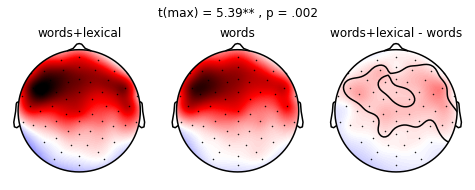

In [40]:
# # Do brain responses differ between word class?
# Test whether adding predcitors that distinguish function and content words improves the predictive power of the TRF models.

# Load predictive power of all models
models = ['words', 'words+lexical', 'acoustic+words', 'acoustic+words+lexical']
rows = []
for model in models:
    for subject in Native_SUBJECTS:
        n_subj = int(subject[1:3])
        trf = eelbrain.load.unpickle(TRF_DIR / subject[:3] / f'{subject[:3]} {model}.pickle')
        rows.append([n_subj, model, trf.proportion_explained])
#print(rows)
model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], rows)
#print(model_data)

# For more interpretable numbers, express proportion explained in terms of the maximum explained variability of the most complete model
index = model_data['model'] == 'acoustic+words+lexical'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')
lexical_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'words+lexical', 'words', match='subject', ds=model_data, tail=1, pmin=0.05)
print(lexical_model_test)
lexical_ttrelated_clus = lexical_model_test.find_clusters(0.05)
print(lexical_ttrelated_clus)

p12 = eelbrain.plot.Topomap(lexical_model_test, ncol=3, title=lexical_model_test, axh=2, clip='circle')
#p12.save(DST / 'Natives_acoustic+words+lexical_TRF_topo.png')

<TTestRelated 'non_lexical', 'lexical' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 30 clusters, p < .001>
id   n_sensors   tstart   tstop   duration   v        p   sig
-------------------------------------------------------------
1    59          0.06     0.98    0.92       5049.7   0   ***
<TTestOneSample 'non_lexical', match='subject', tail=1, samples=10000, pmin=0.05, tstart=0, 22 clusters, p < .001>
id   n_sensors   tstart        tstop   duration   v      p   sig
----------------------------------------------------------------
1    57          -1.3878e-17   0.52    0.52       4198   0   ***
<TTestOneSample 'lexical', match='subject', tail=1, samples=10000, pmin=0.05, tstart=0, 16 clusters, p = .019>
id   n_sensors   tstart        tstop   duration   v        p        sig
-----------------------------------------------------------------------
1    43          -1.3878e-17   0.15    0.15       762.24   0.0186   *  


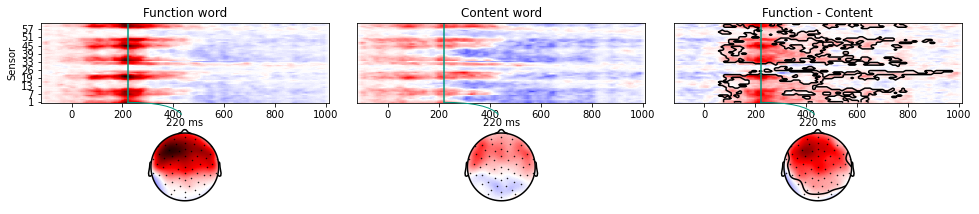

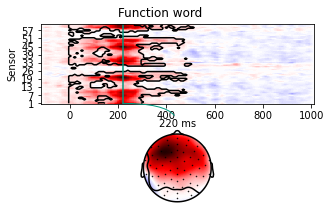

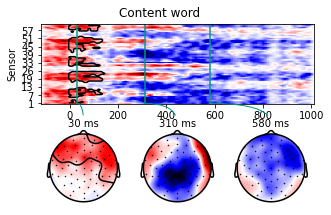

In [46]:
# ## How do the responses differ?
# Compare the TRFs corresponding to content and function words.

# Load the TRFs:
# Keep `h_scaled` instead of `h` so that we can compare and add TRFs to different predictors
# Because each predictor gets normalized for estimation, the scale of the TRFs in `h` are all different
# The `h_scaled` attribute reverses that normalization, so that the TRFs are all in a common scale
rows = []
for subject in Native_SUBJECTS:
    n_subj = int(subject[1:3])
    trf = eelbrain.load.unpickle(TRF_DIR / subject[:3] / f'{subject[:3]} words+lexical.pickle')
    rows.append([n_subj, model, *trf.h_scaled])
    #print(model)
trfs = eelbrain.Dataset.from_caselist(['subject', 'model', *trf.x], rows)
#print(trfs)


# Each word has an impulse of the general word predictor, as well as one form the word-class specific predictor
# Accordingly, each word's response consists of the general word TRF and the word-class specific TRF
# To reconstruct the responses to the two kinds of words, we thus want to add the general word TRF and the word-class specific TRF:
word_difference = eelbrain.testnd.TTestRelated('non_lexical + word', 'lexical + word', ds=trfs, tail=1, tstart=0, pmin=0.05)
function_Onesamtest = eelbrain.testnd.TTestOneSample('non_lexical', match='subject', ds=trfs, tail=1, tstart=0, pmin=0.05)
content_Onesamtest = eelbrain.testnd.TTestOneSample('lexical', match='subject', ds=trfs, tail=1, tstart=0, pmin=0.05)

word_diff_clus = word_difference.find_clusters(0.05)
function_clus = function_Onesamtest.find_clusters(0.05)
content_clus = content_Onesamtest.find_clusters(0.05)

print(word_difference)
print(word_diff_clus)
print(function_Onesamtest)
print(function_clus)
print(content_Onesamtest)
print(content_clus)

p13 = eelbrain.plot.TopoArray(word_difference, axtitle=["Function word", "Content word", "Function - Content"], t=[0.220], clip='circle')  # t=[0.120, 0.220, 0.400]
p14 = eelbrain.plot.TopoArray(function_Onesamtest, title="Function word", t=[0.22], clip='circle')
p15 = eelbrain.plot.TopoArray(content_Onesamtest, title="Content word", t=[0.03, 0.31, 0.58], clip='circle')

p13.save(DST / 'Natives_Islexical_TRF.png')
p14.save(DST / 'Natives_Function_word_TRF.png')
p15.save(DST / 'Natives_Content_word_TRF.png')

## Natives POS-Models TRFs

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
        # Acoustic models
        'envelope': [envelope],
        'envelope+onset': [envelope, onset_envelope],
        'acoustic': [gammatone, gammatone_onsets],
        
        # Models with word-onsets and word-class
        'words': [word_onsets],
        'words+lexical': [word_onsets, word_lexical, word_nlexical],
        'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
        'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
        
        # Language Models
        'words+lexical': [word_onsets, word_lexical, word_nlexical],  # = m(covar)
        'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],  # = m1(covar + Ngram)
        'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],  # = m2(covar + CFG)
        'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical]  # = m3(covar + CFG + Ngram)
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

In [26]:
## NATIVES ##

STIMULI = [str(i) for i in range(1, 13)]
#DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
DATA_ROOT = Path("/Users/neuroling/Downloads/DINGHSIN_Results/Alice_Experiments_Results")
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)
DST = TRF_DIR / 'Natives_figures'
DST.mkdir(exist_ok=True)

['S44_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S13_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S41_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S39_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S42_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq

<TTestRelated 'det', 'model', 'Ngram', 'words+lexical', 'subject' (n=33), tail=1, samples=10000, pmin=0.05, 1 clusters, p < .001>
id   n_sensors   v        p   sig
---------------------------------
1    44          119.76   0   ***
<TTestRelated 'det', 'model', 'CFG', 'words+lexical', 'subject' (n=33), tail=1, samples=10000, pmin=0.05, 1 clusters, p < .001>
id   n_sensors   v        p   sig
---------------------------------
1    37          99.837   0   ***
<TTestRelated 'det', 'model', 'Ngram', 'CFG', 'subject' (n=33), tail=1, samples=10000, pmin=0.05, 1 clusters, p < .001>
id   n_sensors   v        p        sig
--------------------------------------
1    32          70.579   0.0003   ***


"\np18.save(DST / 'Natives_Ngram_TRF_topo.png')\np19.save(DST / 'Natives_CFG_TRF_topo.png')\np20.save(DST / 'Natives_NgramCFG_TRF_topo.png')\n"

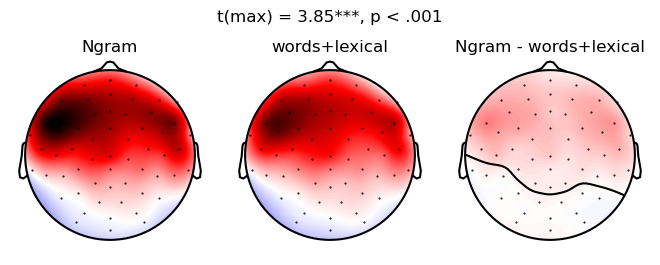

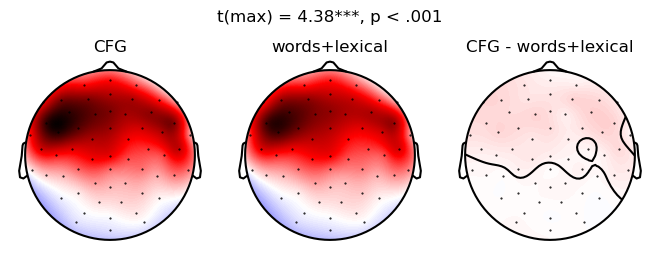

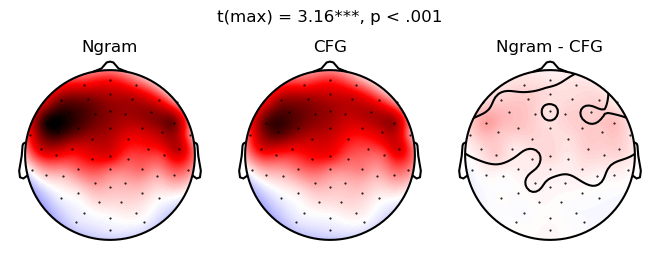

In [27]:
# # Do brain responses differ between word class?
# Test whether adding predcitors that distinguish function and content words improves the predictive power of the TRF models.

# Load predictive power of all models
models = ['words+lexical', 'Ngram', 'CFG', 'Ngram-CFG_all']
rows = []
for model in models:
    for subject in Native_SUBJECTS:
        n_subj = int(subject[1:3])
        trf = eelbrain.load.unpickle(TRF_DIR / subject[:3] / f'{subject[:3]} {model}.pickle')
        trf.x = ['ngram', 'cfg', 'word', 'lexical', 'non_lexical']
        rows.append([n_subj, model, trf.proportion_explained])
model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], rows)

# For more interpretable numbers, express proportion explained in terms of the maximum explained variability of the most complete model
index = model_data['model'] == 'Ngram-CFG_all'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')

 # OLD commands(Dich it for now)
Ngram_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'Ngram', 'words+lexical', match='subject', ds=model_data, tail=1, pmin=0.05)
CFG_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'CFG', 'words+lexical', match='subject', ds=model_data, tail=1, pmin=0.05)
NgramCFG_model_test = eelbrain.testnd.TTestRelated('det', 'model', 'Ngram', 'CFG', match='subject', ds=model_data, tail=1, pmin=0.05)

Ngram_ttrelated_clus = Ngram_model_test.find_clusters(0.05)
CFG_ttrelated_clus = CFG_model_test.find_clusters(0.05)
NgramCFG_ttrelated_clus = NgramCFG_model_test.find_clusters(0.05)

print(Ngram_model_test)
print(Ngram_ttrelated_clus)
print(CFG_model_test)
print(CFG_ttrelated_clus)
print(NgramCFG_model_test)
print(NgramCFG_ttrelated_clus)

p18 = eelbrain.plot.Topomap(Ngram_model_test, ncol=3, title=Ngram_model_test, axh=2, clip='circle')
p19 = eelbrain.plot.Topomap(CFG_model_test, ncol=3, title=CFG_model_test, axh=2, clip='circle')
p20 = eelbrain.plot.Topomap(NgramCFG_model_test, ncol=3, title=NgramCFG_model_test, axh=2, clip='circle')

"""
p18.save(DST / 'Natives_Ngram_TRF_topo.png')
p19.save(DST / 'Natives_CFG_TRF_topo.png')
p20.save(DST / 'Natives_NgramCFG_TRF_topo.png')
"""

subject   model        
-----------------------
44        Ngram-CFG_all
20        Ngram-CFG_all
13        Ngram-CFG_all
1         Ngram-CFG_all
16        Ngram-CFG_all
41        Ngram-CFG_all
25        Ngram-CFG_all
37        Ngram-CFG_all
4         Ngram-CFG_all
18        Ngram-CFG_all
39        Ngram-CFG_all
10        Ngram-CFG_all
15        Ngram-CFG_all
26        Ngram-CFG_all
42        Ngram-CFG_all
34        Ngram-CFG_all
38        Ngram-CFG_all
19        Ngram-CFG_all
6         Ngram-CFG_all
35        Ngram-CFG_all
14        Ngram-CFG_all
3         Ngram-CFG_all
11        Ngram-CFG_all
22        Ngram-CFG_all
5         Ngram-CFG_all
36        Ngram-CFG_all
40        Ngram-CFG_all
17        Ngram-CFG_all
12        Ngram-CFG_all
45        Ngram-CFG_all
21        Ngram-CFG_all
48        Ngram-CFG_all
8         Ngram-CFG_all
-----------------------
NDVars: ngram, cfg, word, lexical, non_lexical
<TTestOneSample 'ngram', match='subject', tail=1, samples=10000, pmin=0.05, tstart=0, 6 c

"\np21_Ngram.save(DST / 'Natives_Ngram_TRF.png')\np22_CFG.save(DST / 'Natives_CFG_TRF.png')\np23_ALL.save(DST / 'Natives_NgramCFG_TRF.png')\n"

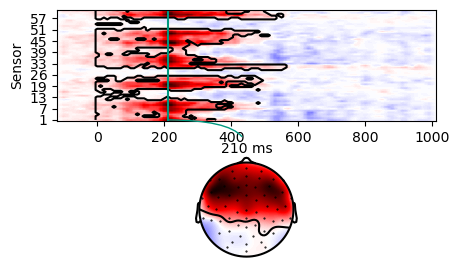

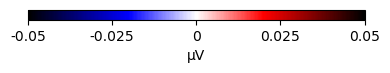

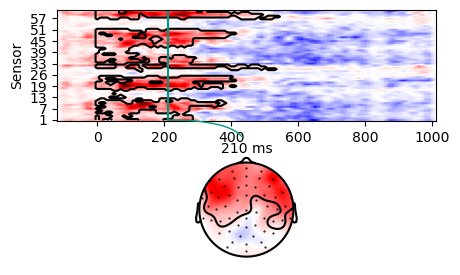

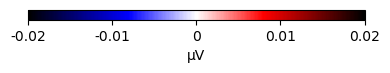

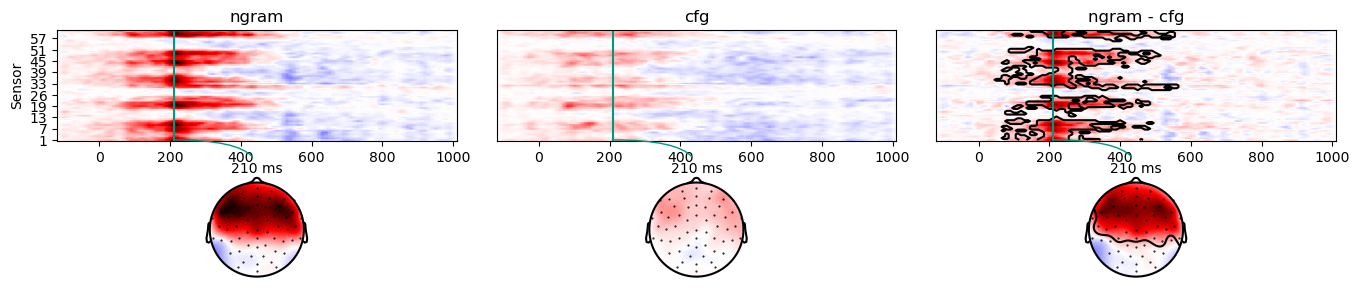

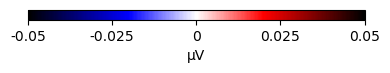

In [29]:
# ## How do the responses differ?
# Compare the TRFs corresponding to Ngram, CFG , and combined(Ngram+CFG).

# Load the TRFs:
# Keep `h_scaled` instead of `h` so that we can compare and add TRFs to different predictors
# Because each predictor gets normalized for estimation, the scale of the TRFs in `h` are all different
# The `h_scaled` attribute reverses that normalization, so that the TRFs are all in a common scale
rows = []
for subject in Native_SUBJECTS:
    n_subj = int(subject[1:3])
    trf = eelbrain.load.unpickle(TRF_DIR / subject[:3] / f'{subject[:3]} Ngram-CFG_all.pickle')
    trf.x = ['ngram', 'cfg', 'word', 'lexical', 'non_lexical'] #rename the n-gram model
    rows.append([n_subj, model, *trf.h_scaled])
trfs = eelbrain.Dataset.from_caselist(['subject', 'model', *trf.x], rows)
#pprint(rows)
print(trfs)
#"""
# redo the t-test (use one-sample to see effects from Ngram & CFG, because it is m1/m2 - m >>)
Ngram_Onesamtest = eelbrain.testnd.TTestOneSample('ngram', match='subject', ds=trfs, tail=1, tstart=0, pmin=0.05)
CFG_Onesamtest = eelbrain.testnd.TTestOneSample('cfg', match='subject', ds=trfs, tail=1, tstart=0, pmin=0.05)
NgramCFG_pairedttest = eelbrain.testnd.TTestRelated('ngram', 'cfg', ds=trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
# Tail >> set 0(two-tailed) or 1 (upper_one-tailed)?  ; Why we close the "subject", then it's ok >> match = None??

# Find the sig clusters
Ngram_Onesamtest_clus =Ngram_Onesamtest.find_clusters(0.05)
CFG_Onesamtest_clus =CFG_Onesamtest.find_clusters(0.05)
NgramCFG_pairedttest_clus =NgramCFG_pairedttest.find_clusters(0.05)

# Print out the Stats and its clusters
print(Ngram_Onesamtest)
print(Ngram_Onesamtest_clus)
print(CFG_Onesamtest)
print(CFG_Onesamtest_clus)
print(NgramCFG_pairedttest)
print(NgramCFG_pairedttest_clus)

# Plot the topoarray of model
p21_Ngram = eelbrain.plot.TopoArray(Ngram_Onesamtest, t=[0.21], clip='circle') 
p21_Ngram.plot_colorbar(width=0.1)
p22_CFG = eelbrain.plot.TopoArray(CFG_Onesamtest, t=[0.21], clip='circle') 
p22_CFG.plot_colorbar(width=0.1)
p23_ALL = eelbrain.plot.TopoArray(NgramCFG_pairedttest, t=[0.21], clip='circle') 
p23_ALL.plot_colorbar(width=0.1)

"""
p21_Ngram.save(DST / 'Natives_Ngram_TRF.png')
p22_CFG.save(DST / 'Natives_CFG_TRF.png')
p23_ALL.save(DST / 'Natives_NgramCFG_TRF.png')
"""

## Natives IF TRFs (all six IMFs)

##### Pre-define models here to have easier access during estimation. In the future, additional models could be added here and the script re-run to generate additional TRFs.
    models = {
           # Acoustic models
    'envelope': [envelope],
    'envelope+onset': [envelope, onset_envelope],
    'acoustic': [gammatone, gammatone_onsets],
    # Models with word-onsets and word-class
    'words': [word_onsets],
    'words+lexical': [word_onsets, word_lexical, word_nlexical],
    'acoustic+words': [gammatone, gammatone_onsets, word_onsets],
    'acoustic+words+lexical': [gammatone, gammatone_onsets, word_onsets, word_lexical, word_nlexical],
    # Language Models
    'Ngram': [word_Ngram, word_onsets, word_lexical, word_nlexical],
    'CFG': [word_CFG, word_onsets, word_lexical, word_nlexical],
    'Ngram-CFG_all': [word_Ngram, word_CFG, word_onsets, word_lexical, word_nlexical],
    
    # IFs
    'IMF1':[imf1],
    'IMF12':[imf1, imf2],
    'IMF123':[imf1, imf2, imf3],
    'IMF1234':[imf1, imf2, imf3, imf4],
    'IMF12345':[imf1, imf2, imf3, imf4, imf5],
    'IMFAll':[imf1, imf2, imf3, imf4, imf5, imf6],

    # F0
    'Fzero+envelope': [F_zero]
    'Fzero+envelope': [envelope, onset_envelope, F_zero]

    # All auditory features model
    'All_model':[envelope, onset_envelope, word_onsets, word_lexical, word_nlexical]
    #'All_Aud_model':[envelope, onset_envelope, word_onsets, word_lexical, word_nlexical, imf1, imf2, imf3, imf4, imf5, imf6, F_zero]
    # All model
    #'All_model':[envelope, onset_envelope, word_onsets, word_lexical, word_nlexical, word_CFG, word_Ngramm, imf_1, imf_2, imf_3, imf_4, imf_5, imf_6, F_zero]
    }
m = covar  
m1 = covar + Ngram  
m2 = covar + CFG  
m3 = covar + Ngram + CFG  

In [3]:
## NATIVES ##
STIMULI = [str(i) for i in range(1, 13)]
#DATA_ROOT = Path("/Volumes/Neurolang_1/Master Program/New_Thesis_topic/Experiments_Results")  #Path("~").expanduser() / 'Data' / 'Alice'
DATA_ROOT = Path("/Users/neuroling/Downloads/DINGHSIN_Results/Alice_Experiments_Results")  # tmp solution for no drive situation
PREDICTOR_audio_DIR = DATA_ROOT / 'TRFs_pridictors/audio_predictors'
PREDICTOR_word_DIR = DATA_ROOT / 'TRFs_pridictors/word_predictors'
EEG_DIR = DATA_ROOT / 'EEG_Natives' / 'Alice_natives_ICAed_fif'
IMF_DIR = DATA_ROOT/ "TRFs_pridictors/IF_predictors"
IMFsLIST = [path.name for path in IMF_DIR.iterdir() if re.match(r'Alice_IF_IMF_*', path.name)] 
Native_SUBJECTS = [path.name for path in EEG_DIR.iterdir() if re.match(r'S\d*', path.name)]
# Define a target directory for TRF estimates and make sure the directory is created
TRF_DIR = DATA_ROOT / 'TRFs_Natives'
TRF_DIR.mkdir(exist_ok=True)
print(Native_SUBJECTS)
print(IMFsLIST)
DST = TRF_DIR / 'Natives_figures'
DST.mkdir(exist_ok=True)

['S44_Alice-natives_sfreq-100_raw.fif', 'S20_Alice-natives_sfreq-100_raw.fif', 'S13_Alice-natives_sfreq-100_raw.fif', 'S01_Alice-natives_sfreq-100_raw.fif', 'S16_Alice-natives_sfreq-100_raw.fif', 'S41_Alice-natives_sfreq-100_raw.fif', 'S25_Alice-natives_sfreq-100_raw.fif', 'S37_Alice-natives_sfreq-100_raw.fif', 'S04_Alice-natives_sfreq-100_raw.fif', 'S18_Alice-natives_sfreq-100_raw.fif', 'S39_Alice-natives_sfreq-100_raw.fif', 'S10_Alice-natives_sfreq-100_raw.fif', 'S15_Alice-natives_sfreq-100_raw.fif', 'S26_Alice-natives_sfreq-100_raw.fif', 'S42_Alice-natives_sfreq-100_raw.fif', 'S34_Alice-natives_sfreq-100_raw.fif', 'S38_Alice-natives_sfreq-100_raw.fif', 'S19_Alice-natives_sfreq-100_raw.fif', 'S06_Alice-natives_sfreq-100_raw.fif', 'S35_Alice-natives_sfreq-100_raw.fif', 'S14_Alice-natives_sfreq-100_raw.fif', 'S03_Alice-natives_sfreq-100_raw.fif', 'S11_Alice-natives_sfreq-100_raw.fif', 'S22_Alice-natives_sfreq-100_raw.fif', 'S05_Alice-natives_sfreq-100_raw.fif', 'S36_Alice-natives_sfreq

In [7]:
# ## How do the responses differ?
# Compare the TRFs corresponding to all individual IMFs, and combined(IMF_ALL).

# Build the model_data['model']
models = ['IMF1', 'IMF12', 'IMF123', 'IMF1234', 'IMF12345', 'IMFAll']
rows = []
for model in models:
    print(model)
    for subject in Native_SUBJECTS:
        n_subj = int(subject[1:3])
        trf = eelbrain.load.unpickle(TRF_DIR / subject[:3] / f'{subject[:3]} {model}.pickle')
        #print(trf)
        trf.x = ['imf1', 'imf2', 'imf3', 'imf4', 'imf5', 'imfall'] #rename the model (no punctuation)
        #rows.append([n_subj, model, *trf.h_scaled])
        rows.append([n_subj, model, trf.proportion_explained])

model_data = eelbrain.Dataset.from_caselist(['subject', 'model', 'det'], rows)
#pprint(rows)
print(model_data)

# For more interpretable numbers, express proportion explained in terms of the maximum explained variability of the most complete model
index = model_data['model'] == 'IMFAll'
model_data['det'] *= 100 / model_data[index, 'det'].mean('case').max('sensor')
# ['IMF_6', 'IMF_4', 'IMF_2', 'IMF_5', 'IMF_1', 'IMF_3'] >> the supposed model names??  >> why would IMF_6 popped up??


IMF1
IMF12
IMF123
IMF1234
IMF12345
IMFAll
subject   model   
------------------
44        IMF1    
20        IMF1    
13        IMF1    
1         IMF1    
16        IMF1    
41        IMF1    
25        IMF1    
37        IMF1    
4         IMF1    
18        IMF1    
39        IMF1    
10        IMF1    
15        IMF1    
26        IMF1    
42        IMF1    
34        IMF1    
38        IMF1    
19        IMF1    
6         IMF1    
35        IMF1    
14        IMF1    
3         IMF1    
11        IMF1    
22        IMF1    
5         IMF1    
36        IMF1    
40        IMF1    
17        IMF1    
12        IMF1    
45        IMF1    
21        IMF1    
48        IMF1    
8         IMF1    
44        IMF12   
20        IMF12   
13        IMF12   
1         IMF12   
16        IMF12   
41        IMF12   
25        IMF12   
37        IMF12   
4         IMF12   
18        IMF12   
39        IMF12   
10        IMF12   
15        IMF12   
26        IMF12   
42        IMF12   
34      

subject   model 
----------------
44        IMFAll
20        IMFAll
13        IMFAll
1         IMFAll
16        IMFAll
41        IMFAll
25        IMFAll
37        IMFAll
4         IMFAll
18        IMFAll
39        IMFAll
10        IMFAll
15        IMFAll
26        IMFAll
42        IMFAll
34        IMFAll
38        IMFAll
19        IMFAll
6         IMFAll
35        IMFAll
14        IMFAll
3         IMFAll
11        IMFAll
22        IMFAll
5         IMFAll
36        IMFAll
40        IMFAll
17        IMFAll
12        IMFAll
45        IMFAll
21        IMFAll
48        IMFAll
8         IMFAll
----------------
NDVars: imf1, imf2, imf3, imf4, imf5, imf6
<TTestOneSample 'imf1', match='subject', tail=1, samples=10000, pmin=0.1, tstart=0, 50 clusters, p = .022>
id   n_sensors   tstart   tstop   duration   v        p        sig
------------------------------------------------------------------
2    54          0.45     0.78    0.33       1225.5   0.0222   *  
<TTestOneSample 'imf2', match='subjec

"\np21_Ngram.save(DST / 'Natives_Ngram_TRF.png')\np22_CFG.save(DST / 'Natives_CFG_TRF.png')\np23_ALL.save(DST / 'Natives_NgramCFG_TRF.png')\n"

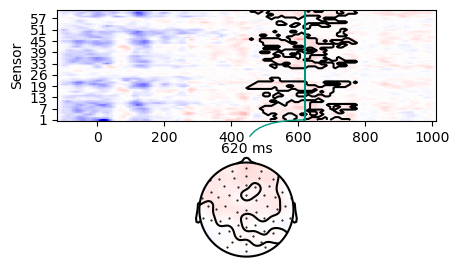

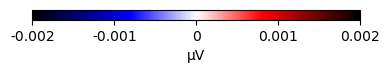

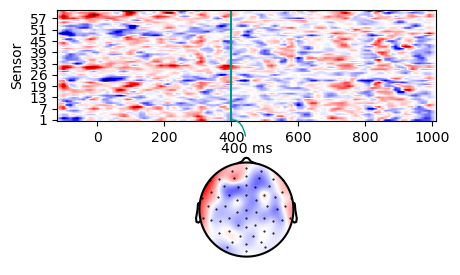

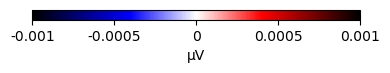

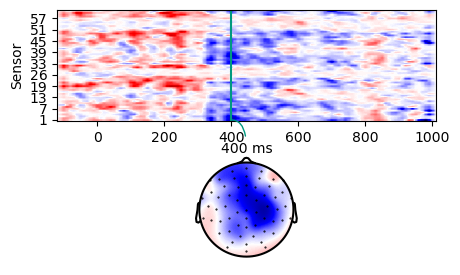

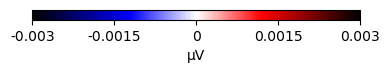

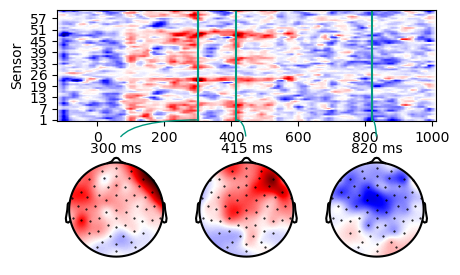

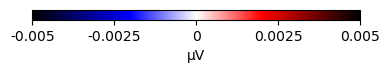

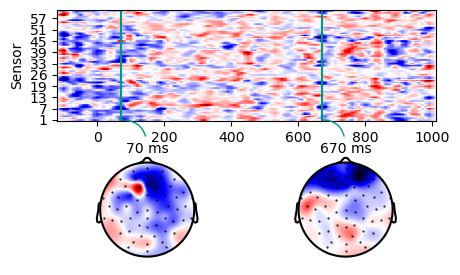

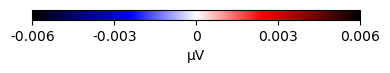

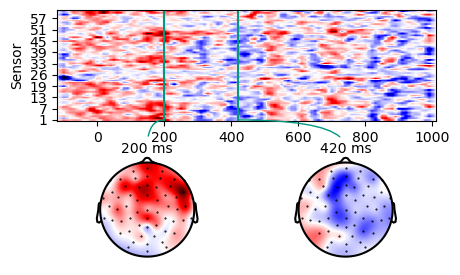

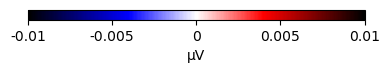

In [68]:
# Load the TRFs:
# Keep `h_scaled` instead of `h` so that we can compare and add TRFs to different predictors
# Because each predictor gets normalized for estimation, the scale of the TRFs in `h` are all different
# The `h_scaled` attribute reverses that normalization, so that the TRFs are all in a common scale

### FOR each IMFs (one sample so far)###
n_rows = []
for subject in Native_SUBJECTS:
    n_subj = int(subject[1:3])
    n_trf = eelbrain.load.unpickle(TRF_DIR / subject[:3] / f'{subject[:3]} IMFAll.pickle')
    #print(n_trf.x)  # old: ['IMF_6', 'IMF_4', 'IMF_2', 'IMF_5', 'IMF_1', 'IMF_3']
    n_trf.x = ['imf1', 'imf2', 'imf3', 'imf4', 'imf5', 'imf6'] #rename the model (no punctuation)
    n_rows.append([n_subj, model, *n_trf.h_scaled])
n_trfs = eelbrain.Dataset.from_caselist(['subject', 'model', *n_trf.x], n_rows)
print(n_trfs)


# redo the t-test (use one-sample to see effects from Ngram & CFG, because it is m1/m2 - m >>)
IMF1_Onesamtest = eelbrain.testnd.TTestOneSample('imf1', match='subject', ds=n_trfs, tail=1, tstart=0, pmin=0.1)
IMF2_Onesamtest = eelbrain.testnd.TTestOneSample('imf2', match='subject', ds=n_trfs, tail=1, tstart=0, pmin=0.1)
IMF3_Onesamtest = eelbrain.testnd.TTestOneSample('imf3', match='subject', ds=n_trfs, tail=1, tstart=0, pmin=0.1)
IMF4_Onesamtest = eelbrain.testnd.TTestOneSample('imf4', match='subject', ds=n_trfs, tail=1, tstart=0, pmin=0.1)
IMF5_Onesamtest = eelbrain.testnd.TTestOneSample('imf5', match='subject', ds=n_trfs, tail=1, tstart=0, pmin=0.1)
IMF6_Onesamtest = eelbrain.testnd.TTestOneSample('imf6', match='subject', ds=n_trfs, tail=1, tstart=0, pmin=0.1)

#IMF_all_pairedttest = eelbrain.testnd.TTestRelated('imf1', 'imf12', 'imf123', 'imf1234', 'imf12345', 'imfAll', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
# Tail >> set 0(two-tailed) or 1 (upper_one-tailed)?  ; Why we close the "subject", then it's ok >> match = None??

# Find the sig clusters
IMF1_Onesamtest_clus =IMF1_Onesamtest.find_clusters(0.1)
IMF2_Onesamtest_clus =IMF2_Onesamtest.find_clusters(0.1)
IMF3_Onesamtest_clus =IMF3_Onesamtest.find_clusters(0.1)
IMF4_Onesamtest_clus =IMF4_Onesamtest.find_clusters(0.1)
IMF5_Onesamtest_clus =IMF5_Onesamtest.find_clusters(0.1)
IMF6_Onesamtest_clus =IMF6_Onesamtest.find_clusters(0.1)

#IMF_all_pairedttest_clus =IMF_all_pairedttest.find_clusters(0.05)

# Print out the Stats and its clusters
print(IMF1_Onesamtest)
print(IMF1_Onesamtest_clus)
print(IMF2_Onesamtest)
print(IMF2_Onesamtest_clus)
print(IMF3_Onesamtest)
print(IMF3_Onesamtest_clus)
print(IMF4_Onesamtest)
print(IMF4_Onesamtest_clus)
print(IMF5_Onesamtest)
print(IMF5_Onesamtest_clus)
print(IMF6_Onesamtest)
print(IMF6_Onesamtest_clus)

#print(IMF_all_pairedttest)
#print(IMF_all_pairedttest_clus)



# Plot the topoarray of model

p24_IMF_1 = eelbrain.plot.TopoArray(IMF1_Onesamtest, t=[0.62], clip='circle') 
p24_IMF_1.plot_colorbar(width=0.1)

p25_IMF_12 = eelbrain.plot.TopoArray(IMF2_Onesamtest, t=[0.40], clip='circle') 
p25_IMF_12.plot_colorbar(width=0.1)

p26_IMF_123 = eelbrain.plot.TopoArray(IMF3_Onesamtest, t=[0.40], clip='circle') 
p26_IMF_123.plot_colorbar(width=0.1)

p27_IMF_1234 = eelbrain.plot.TopoArray(IMF4_Onesamtest, t=[0.30, 0.415, 0.82], clip='circle') 
p27_IMF_1234.plot_colorbar(width=0.1)

p28_IMF_12345 = eelbrain.plot.TopoArray(IMF5_Onesamtest, t=[0.07, 0.67], clip='circle') 
p28_IMF_12345.plot_colorbar(width=0.1)

p29_IMF_All = eelbrain.plot.TopoArray(IMF6_Onesamtest, t=[0.20, 0.42], clip='circle') 
p29_IMF_All.plot_colorbar(width=0.1)


#p30_All = eelbrain.plot.TopoArray(IMF_all_pairedttest, t=[0.21], clip='circle') 
#p30_All.plot_colorbar(width=0.1)

"""
p21_Ngram.save(DST / 'Natives_Ngram_TRF.png')
p22_CFG.save(DST / 'Natives_CFG_TRF.png')
p23_ALL.save(DST / 'Natives_NgramCFG_TRF.png')
"""

In [ ]:
"""
imf1 min = -29.9403 max = 49.8705 mean = 17.1827
imf2 min = -17.1891 max = 33.8395 mean = 7.6307
imf3 min = -15.5781 max = 29.1027 mean = 4.1004
imf4 min = -19.0941 max = 25.2857 mean = 2.1606
imf5 min = -21.1892 max = 19.7518 mean = 1.0657
imf6 min = -18.8191 max = 20.1623 mean = 0.5355
"""

<TTestRelated 'imf1', 'imf2' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 77 clusters, p = .596>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------
<TTestRelated 'imf2', 'imf3' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 47 clusters, p = .050>
id   n_sensors   tstart   tstop   duration   v        p      sig
----------------------------------------------------------------
3    38          0.44     0.6     0.16       382.52   0.05   *  
<TTestRelated 'imf3', 'imf4' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 71 clusters, p = .051>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------
<TTestRelated 'imf4', 'imf5' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 49 clusters, p = .563>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------
<TTestRelated 'imf5', 'imf6' (n=33), tail=1, sa

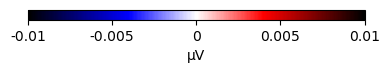

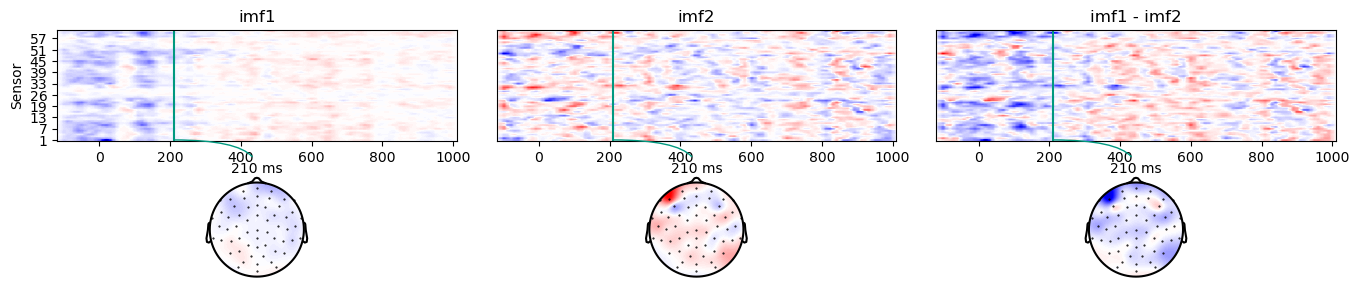

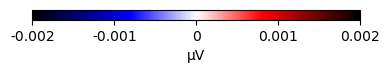

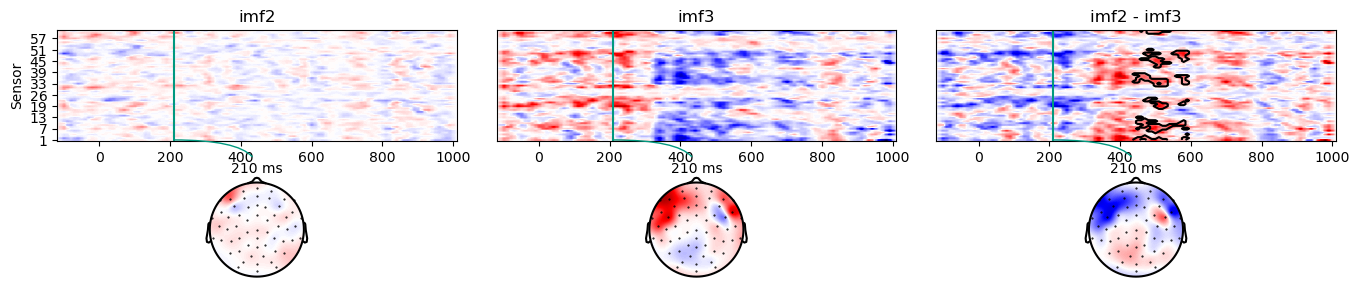

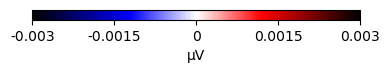

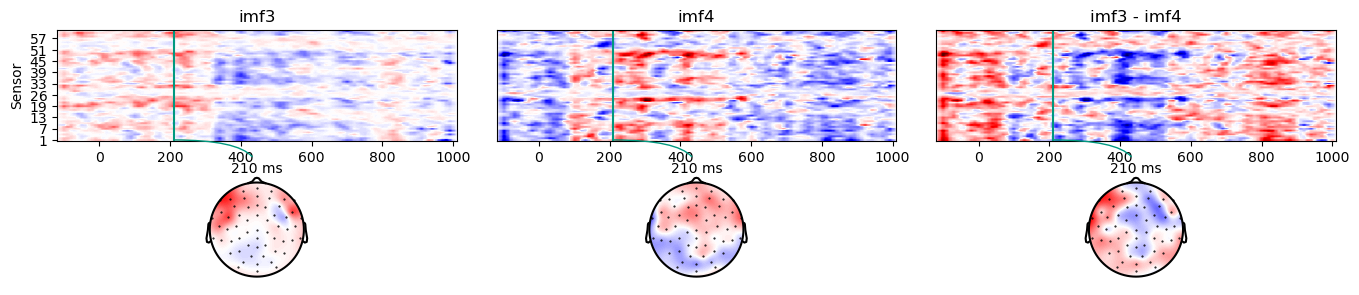

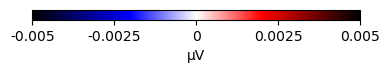

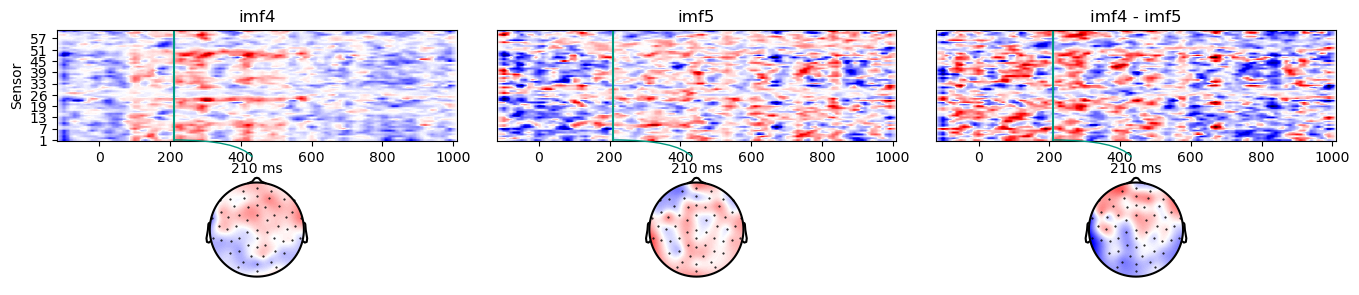

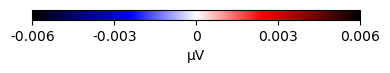

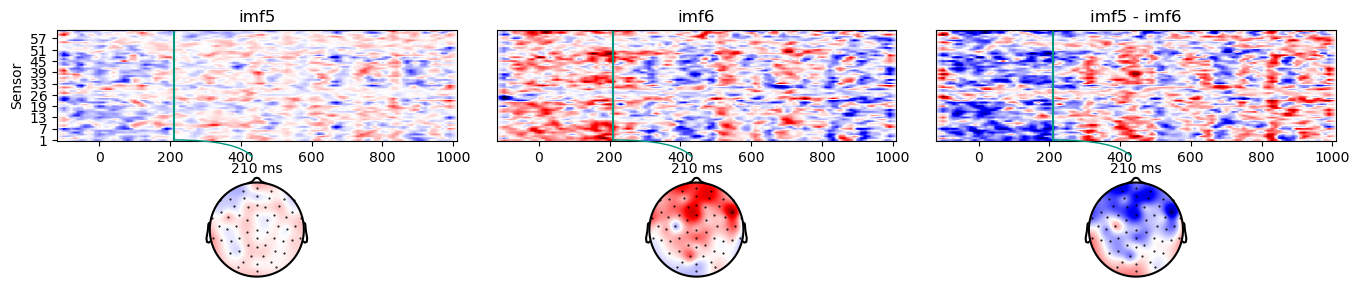

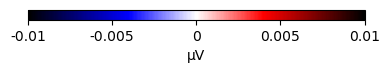

In [69]:
### FOR paired-t test of between IMFs ###

IMF_12_pairedttest = eelbrain.testnd.TTestRelated('imf1', 'imf2', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_23_pairedttest = eelbrain.testnd.TTestRelated('imf2', 'imf3', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_34_pairedttest = eelbrain.testnd.TTestRelated('imf3', 'imf4', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_45_pairedttest = eelbrain.testnd.TTestRelated('imf4', 'imf5', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_56_pairedttest = eelbrain.testnd.TTestRelated('imf5', 'imf6', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
# Tail >> set 0(two-tailed) or 1 (upper_one-tailed)?  ; Why we close the "subject", then it's ok >> match = None??


IMF_12_pairedttest_clus =IMF_12_pairedttest.find_clusters(0.05)
IMF_23_pairedttest_clus =IMF_23_pairedttest.find_clusters(0.05)
IMF_34_pairedttest_clus =IMF_34_pairedttest.find_clusters(0.05)
IMF_45_pairedttest_clus =IMF_45_pairedttest.find_clusters(0.05)
IMF_56_pairedttest_clus =IMF_56_pairedttest.find_clusters(0.05)


print(IMF_12_pairedttest)
print(IMF_12_pairedttest_clus)
print(IMF_23_pairedttest)
print(IMF_23_pairedttest_clus)
print(IMF_34_pairedttest)
print(IMF_34_pairedttest_clus)
print(IMF_45_pairedttest)
print(IMF_45_pairedttest_clus)
print(IMF_56_pairedttest)
print(IMF_56_pairedttest_clus)

p31_imf12 = eelbrain.plot.TopoArray(IMF_12_pairedttest, t=[0.21], clip='circle') 
p31_imf12.plot_colorbar(width=0.1)
p32_imf23 = eelbrain.plot.TopoArray(IMF_23_pairedttest, t=[0.21], clip='circle')  ## imf2-imf3 sig
p32_imf23.plot_colorbar(width=0.1)
p33_imf34 = eelbrain.plot.TopoArray(IMF_34_pairedttest, t=[0.21], clip='circle') 
p33_imf34.plot_colorbar(width=0.1)
p34_imf45 = eelbrain.plot.TopoArray(IMF_45_pairedttest, t=[0.21], clip='circle') 
p34_imf45.plot_colorbar(width=0.1)
p35_imf56 = eelbrain.plot.TopoArray(IMF_56_pairedttest, t=[0.21], clip='circle') 
p35_imf56.plot_colorbar(width=0.1)

<TTestRelated 'imf6', 'imf5' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 66 clusters, p = .097>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------
<TTestRelated 'imf5', 'imf4' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 81 clusters, p = .274>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------
<TTestRelated 'imf4', 'imf3' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 31 clusters, p = .018>
id   n_sensors   tstart   tstop   duration   v       p        sig
-----------------------------------------------------------------
3    39          0.37     0.6     0.23       652.4   0.0177   *  
<TTestRelated 'imf3', 'imf2' (n=33), tail=1, samples=10000, pmin=0.05, tstart=0, 45 clusters, p = .114>
id   n_sensors   tstart   tstop   duration   v   p   sig
--------------------------------------------------------
<TTestRelated 'imf2', 'imf1' (n=33), tail=1,

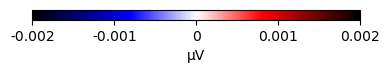

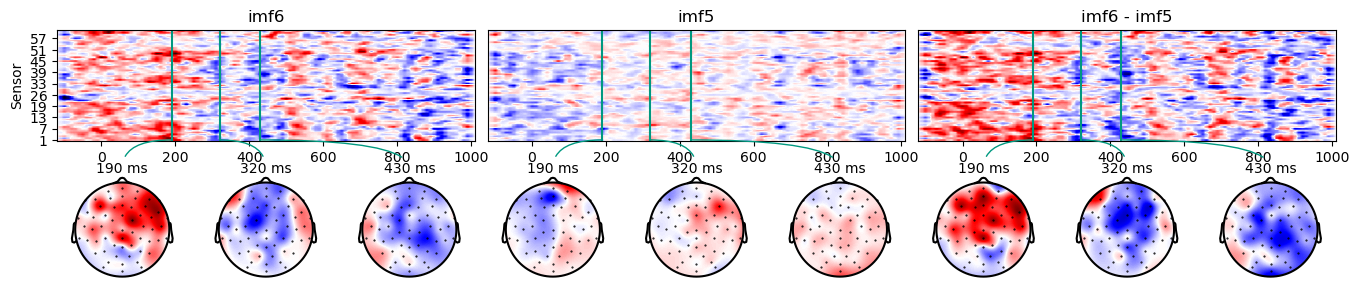

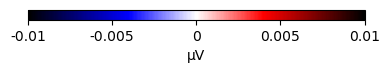

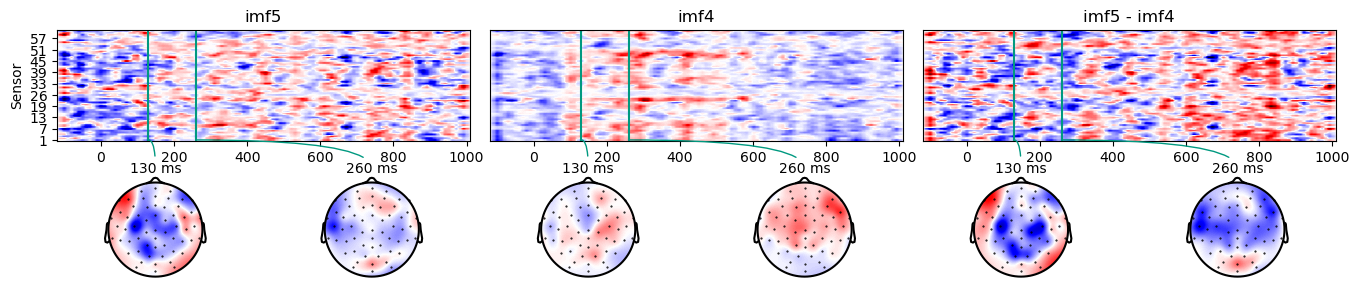

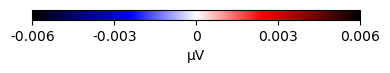

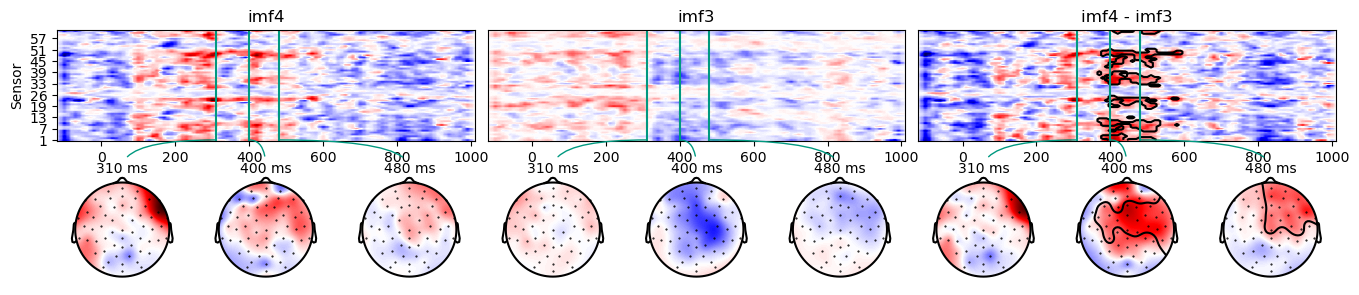

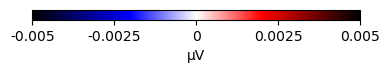

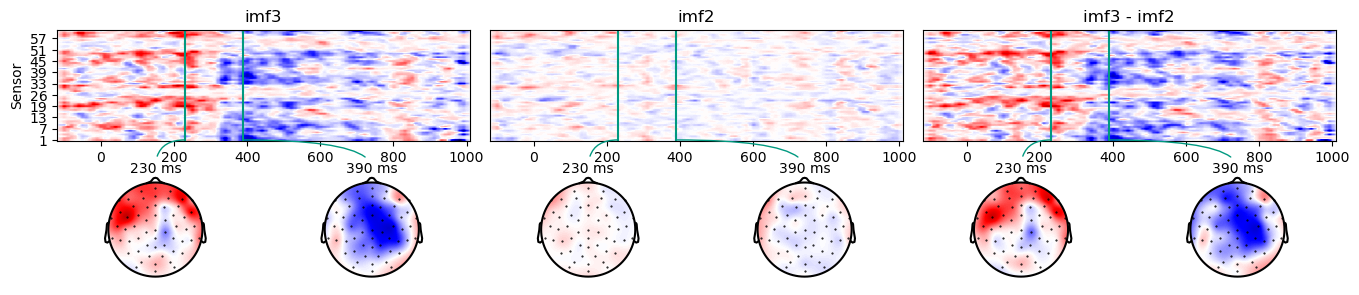

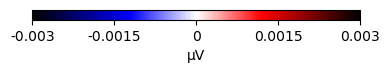

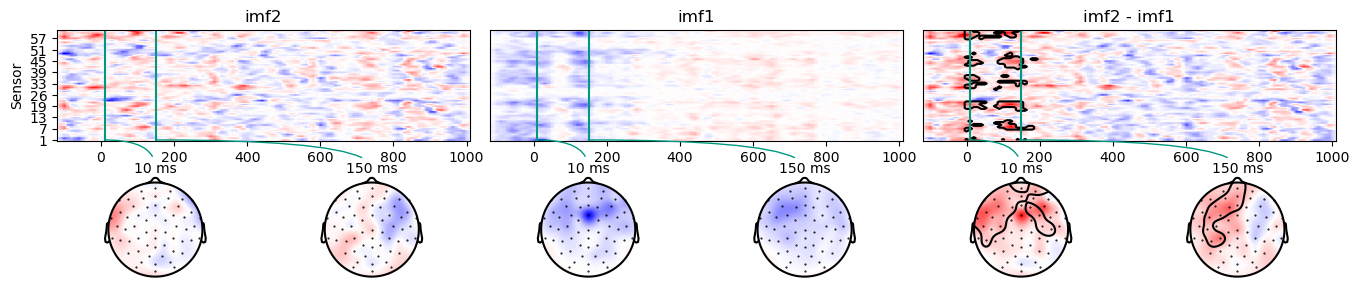

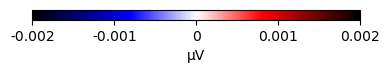

In [72]:
### FOR paired-t test of between IMFs part two ###

IMF_65_pairedttest = eelbrain.testnd.TTestRelated('imf6', 'imf5', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_54_pairedttest = eelbrain.testnd.TTestRelated('imf5', 'imf4', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_43_pairedttest = eelbrain.testnd.TTestRelated('imf4', 'imf3', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_32_pairedttest = eelbrain.testnd.TTestRelated('imf3', 'imf2', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
IMF_21_pairedttest = eelbrain.testnd.TTestRelated('imf2', 'imf1', ds=n_trfs, tail=1, tstart=0, pmin=0.05)  #, match='subject'
# Tail >> set 0(two-tailed) or 1 (upper_one-tailed)?  ; Why we close the "subject", then it's ok >> match = None??


IMF_65_pairedttest_clus =IMF_65_pairedttest.find_clusters(0.05)
IMF_54_pairedttest_clus =IMF_54_pairedttest.find_clusters(0.05)
IMF_43_pairedttest_clus =IMF_43_pairedttest.find_clusters(0.05)
IMF_32_pairedttest_clus =IMF_32_pairedttest.find_clusters(0.05)
IMF_21_pairedttest_clus =IMF_21_pairedttest.find_clusters(0.05)


print(IMF_65_pairedttest)
print(IMF_65_pairedttest_clus)
print(IMF_54_pairedttest)
print(IMF_54_pairedttest_clus)
print(IMF_43_pairedttest)
print(IMF_43_pairedttest_clus)
print(IMF_32_pairedttest)
print(IMF_32_pairedttest_clus)
print(IMF_21_pairedttest)
print(IMF_21_pairedttest_clus)

p31_imf65 = eelbrain.plot.TopoArray(IMF_65_pairedttest, t=[0.19, 0.32, 0.43], clip='circle') 
p31_imf65.plot_colorbar(width=0.1)
p32_imf54 = eelbrain.plot.TopoArray(IMF_54_pairedttest, t=[0.13, 0.26], clip='circle') 
p32_imf54.plot_colorbar(width=0.1)
p33_imf43 = eelbrain.plot.TopoArray(IMF_43_pairedttest, t=[0.31, 0.40, 0.48], clip='circle') ## imf4-imf3 sig
p33_imf43.plot_colorbar(width=0.1)
p34_imf32 = eelbrain.plot.TopoArray(IMF_32_pairedttest, t=[0.23, 0.39], clip='circle') 
p34_imf32.plot_colorbar(width=0.1)
p35_imf21 = eelbrain.plot.TopoArray(IMF_21_pairedttest, t=[0.01, 0.15], clip='circle')  ## imf2-imf1 sig
p35_imf21.plot_colorbar(width=0.1)